In [1]:
#Importando a bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [2]:
#Leitura do Arquivo Excel
df = pd.read_excel("AdventureWorks.xlsx")

In [3]:
#amostra das 5 primeiras linhas do arquivo
df.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


In [4]:
#Quantidade de Colunas e Linhas da Tabela
df.shape

(904, 16)

In [5]:
#Tipos das colunas do Arquivo
df.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

In [6]:
#Qual foi  a receita total
df["Valor Venda"].sum()

5984606.1426

In [7]:
#Qual foi o custo total -> Criação da Coluna Custo
df["Custo"] = df["Custo Unitário"].mul(df["Quantidade"])

In [8]:
round(df["Custo"].sum(),2)

2486783.05

In [9]:
#Qual foi o lucro -> Criação da Coluna Lucro
df["Lucro"]=df["Valor Venda"] - df["Custo"]

In [10]:
round(df["Lucro"].sum(),2)

3497823.09

In [11]:
#Tempo que levou para levar um determinado produto -> Criação da Coluna Tempo de Envio
df["Tempo_envio"] = df["Data Envio"] - df["Data Venda"]

In [12]:
#Média de tempo de envio por marca -> Transformar a coluna em integer
df["Tempo_envio"] = (df["Data Envio"] - df["Data Venda"]).dt.days

In [13]:
df.groupby("Marca")["Tempo_envio"].mean()

Marca
Adventure Works    8.663866
Contoso            8.470930
Fabrikam           8.510121
Name: Tempo_envio, dtype: float64

In [14]:
#Verificando valores ausentes
df.isnull().sum()

Data Venda        0
Data Envio        0
ID Loja           0
ID Produto        0
ID Cliente        0
No. Venda         0
Custo Unitário    0
Preço Unitário    0
Quantidade        0
Valor Desconto    0
Valor Venda       0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
Custo             0
Lucro             0
Tempo_envio       0
dtype: int64

In [17]:
#Saber o lucro por ano e por marca
df.groupby([df["Data Venda"].dt.year, "Marca"])["Lucro"].sum()

Data Venda  Marca          
2008        Adventure Works             306,641.16
            Contoso                      56,416.00
            Fabrikam                  1,557,020.55
2009        Adventure Works             405,395.08
            Contoso                     138,258.95
            Fabrikam                  1,034,091.35
Name: Lucro, dtype: float64

In [16]:
#Melhora a visualização tirando a notação cientifica
pd.options.display.float_format = '{:20,.2f}'.format

In [20]:
#Resetando o index
lucro_ano = df.groupby([df["Data Venda"].dt.year, "Marca"])["Lucro"].sum().reset_index()
lucro_ano

,Data Venda,Marca,Lucro
0,2008,Adventure Works,"306,641.16"
1,2008,Contoso,"56,416.00"
2,2008,Fabrikam,"1,557,020.55"
3,2009,Adventure Works,"405,395.08"
4,2009,Contoso,"138,258.95"
5,2009,Fabrikam,"1,034,091.35"


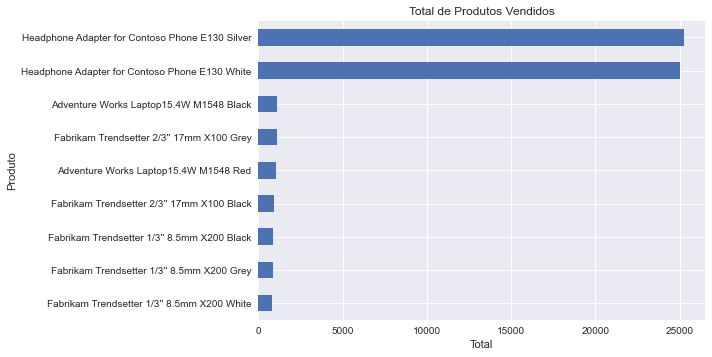

In [22]:
#Total de produto vendidos
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending = True).plot.barh(title = "Total de Produtos Vendidos")
plt.xlabel("Total")
plt.ylabel("Produto");

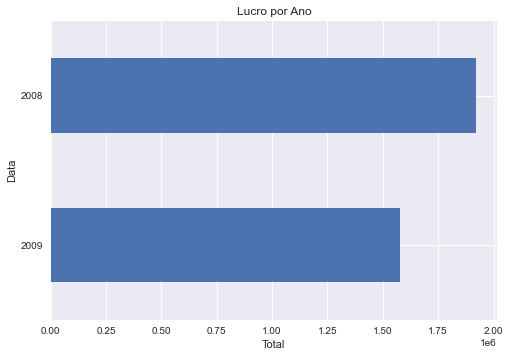

In [24]:
df.groupby(df["Data Venda"].dt.year)["Lucro"].sum().sort_values(ascending = True).plot.barh(title = "Lucro por Ano")
plt.xlabel("Total")
plt.ylabel("Data");

In [25]:
#Criação de uma dataframe com os dados de 2009
df_2009 = df[df["Data Venda"].dt.year == 2009]

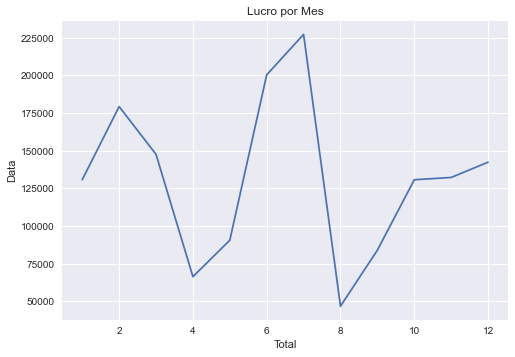

In [27]:
#Lucro por  Mês
df_2009.groupby(df_2009["Data Venda"].dt.month)["Lucro"].sum().plot(title = "Lucro por Mes")
plt.xlabel("Total")
plt.ylabel("Data");

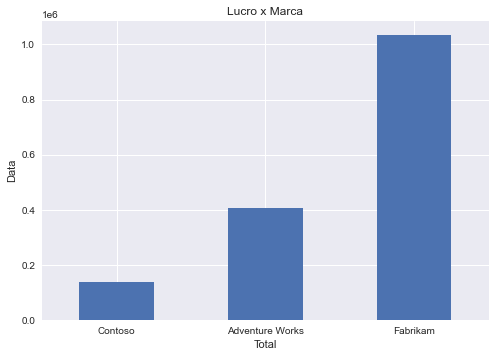

In [31]:
df_2009.groupby("Marca")["Lucro"].sum().sort_values(ascending=True).plot.bar(title = "Lucro x Marca")
plt.xlabel("Total")
plt.ylabel("Data")
plt.xticks(rotation = 'horizontal');

In [35]:
#Dados estatisticos do dado te envio
df["Tempo_envio"].describe()

count                 904.00
mean                    8.54
std                     3.06
min                     4.00
25%                     6.00
50%                     9.00
75%                    11.00
max                    20.00
Name: Tempo_envio, dtype: float64

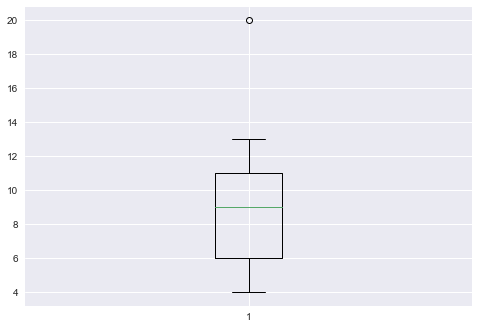

In [38]:
plt.boxplot(df["Tempo_envio"]);

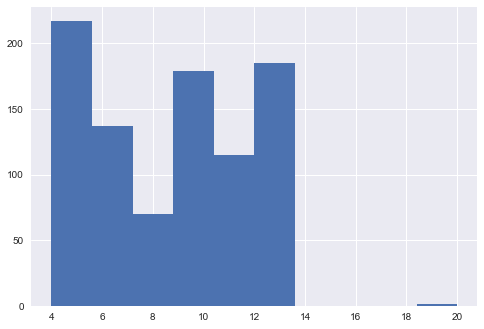

In [40]:
#Histograma
plt.hist(df["Tempo_envio"]);

In [41]:
df[df["Tempo_envio"]==20]

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo_envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20


In [42]:
df.to_csv("df_vendas_novo.csv",index=False)